In [2]:
'''Fashion MNIST:

The Fashion-MNIST dataset is a collection of images commonly used in machine learning and computer vision research.
It serves as an alternative to the traditional MNIST dataset, which consists of handwritten digits.
The Fashion-MNIST dataset is designed to benchmark the performance of machine learning models on a broader range of image types.'''

'Fashion MNIST:\n\nThe Fashion-MNIST dataset is a collection of images commonly used in machine learning and computer vision research.\nIt serves as an alternative to the traditional MNIST dataset, which consists of handwritten digits.\nThe Fashion-MNIST dataset is designed to benchmark the performance of machine learning models on a broader range of image types.'

In [ ]:
'''Contents:

The dataset contains grayscale images (28x28 pixels) of 10 different fashion categories.
Each image is associated with a label indicating the category of clothing it represents.
Categories:- 0: T-shirt/top 1: Trouser 2: Pullover 3: Dress 4: Coat
5: Sandal 6: Shirt 7: Sneaker 8: Bag 9: Ankle boot'''

In [3]:
# 1.Importing neccesary libraries

from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

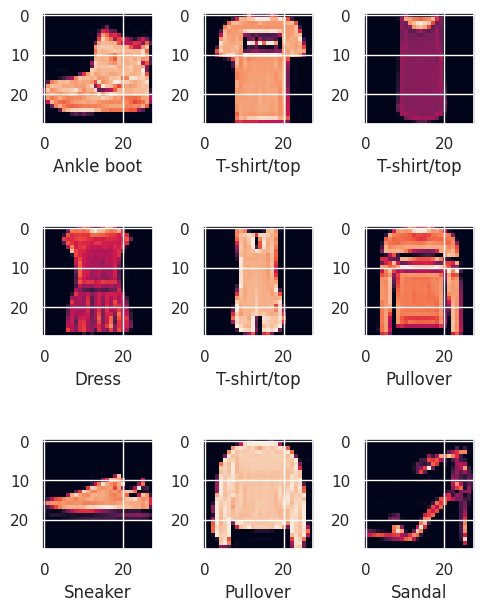

In [13]:
# 2. Visualisation

cnt=1
sns.set()
plt.figure(figsize=(5,7))
for i in range(9):
    plt.subplot(3,3,cnt)
    plt.imshow(train_images[i])
    plt.xlabel(labels[train_labels[i]])
    plt.tight_layout()
    cnt+=1

In [14]:
train_labels.shape

(60000,)

In [15]:
print(train_images.shape,test_images.shape,sep="\t")

(60000, 28, 28)	(10000, 28, 28)


In [ ]:
''' 3. Preprocessing

An Image consists of 3 parameters (height, width, no. of channels) Here, only two parameters are there and channel parameter is missing,
which is essential while training CNN , so it needs to be reshape by adding channel parameter'''

In [16]:
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

In [17]:
# Scaling of Image pixels
train_images_scaled = train_images/255
test_images_scaled = test_images/255

In [18]:
print(train_images_scaled.shape,test_images_scaled.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [19]:
train_images_scaled

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

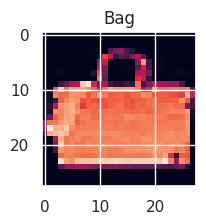

In [20]:
plt.figure(figsize=(3,2))
plt.imshow(train_images[99])
plt.title(labels[train_labels[99]])
plt.show()

In [22]:
# 4. Model Building & Training

from keras import Sequential
from keras.layers import MaxPooling2D,Conv2D,Flatten,Dense

In [23]:
model = Sequential([

    #cnn layers
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # dense
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.fit(train_images_scaled,train_labels,epochs=10,validation_data=(test_images_scaled,test_labels))

Epoch 1/10
1875/1875 [==============================] - 68s 35ms/step - loss: 0.4663 - accuracy: 0.8313 - val_loss: 0.3681 - val_accuracy: 0.8688
Epoch 2/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.3149 - accuracy: 0.8865 - val_loss: 0.3294 - val_accuracy: 0.8792
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2685 - accuracy: 0.9011 - val_loss: 0.2863 - val_accuracy: 0.8937
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2382 - accuracy: 0.9126 - val_loss: 0.2789 - val_accuracy: 0.8981
Epoch 5/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.2151 - accuracy: 0.9215 - val_loss: 0.2557 - val_accuracy: 0.9067
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1941 - accuracy: 0.9275 - val_loss: 0.2788 - val_accuracy: 0.9018
Epoch 7/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.1755 - accuracy: 0.9334 - val_loss: 0.2984 -

In [26]:
''' 5. Model Metrics Evaluation

Key Achievements:

Training Accuracy: 95.35%

Validation Accuracy: 90.29%

Loss: 0.1218



These metrics underscore the model's proficiency in recognizing diverse fashion items and its robust generalization
capabilities on unseen data. The journey involved meticulous fine-tuning, exploring various layers of
convolutional neural network architecture, and deep immersion into the nuances of the Fashion-MNIST dataset.



Successfully Addressed Categories:

T-shirt/top ✔️

Trouser ✔️

Pullover ✔️

Dress ✔️

Coat ✔️

Sandal ✔️

Shirt ✔️

Sneaker ✔️

Bag ✔️

Ankle boot ✔️'''

In [27]:
model.evaluate(test_images_scaled,test_labels)


313/313 [==============================] - 4s 12ms/step - loss: 0.2811 - accuracy: 0.9071


[0.28112825751304626, 0.9071000218391418]

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [29]:
y_pred = model.predict(test_images_scaled)

313/313 [==============================] - 3s 10ms/step


In [30]:
y_pred_labels = [np.argmax(x) for x in y_pred]

In [31]:
y_pred_labels[:5]

[9, 2, 1, 1, 6]

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
matrix = confusion_matrix(test_labels,y_pred_labels)

Text(91.25, 0.5, 'Actual value')

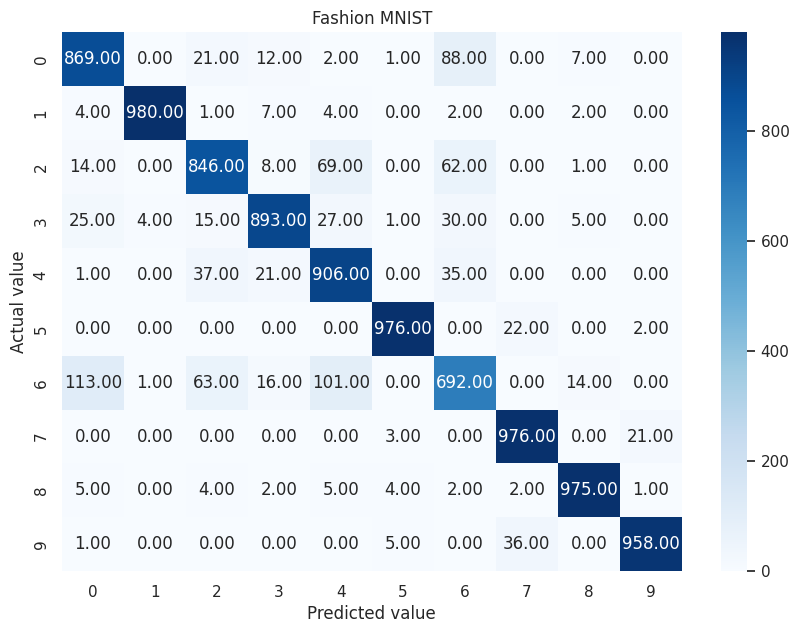

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(matrix,annot=True,fmt='.2f',cmap='Blues')
plt.title('Fashion MNIST')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")

In [35]:
print(classification_report(test_labels,y_pred_labels))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.85      0.85      1000
           3       0.93      0.89      0.91      1000
           4       0.81      0.91      0.86      1000
           5       0.99      0.98      0.98      1000
           6       0.76      0.69      0.72      1000
           7       0.94      0.98      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [36]:
# 6. Building Predictive System

test_data = test_images_scaled[4].reshape((1,28,28,1))

In [37]:
test_data.shape

(1, 28, 28, 1)

In [38]:
pred = model.predict(test_data)

1/1 [==============================] - 0s 48ms/step


In [39]:
pred_label = np.argmax(pred)

In [40]:
pred_label

6

In [41]:
test_labels[4]

6

Text(0.5, 0, 'Shirt')

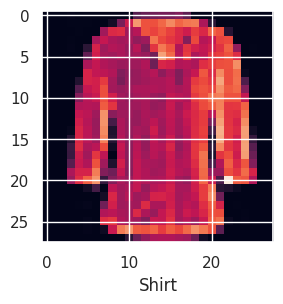

In [42]:
plt.figure(figsize=(4,3))
plt.imshow(test_data[0])
plt.xlabel(labels[pred_label])